# Numpy

Este es sólo un pequeño tutorial introductorio a las funcionalidades de Numpy, para más información se puede consultar el [manual](https://docs.scipy.org/doc/numpy/contents.html).

## array

El [array](https://docs.scipy.org/doc/numpy/reference/arrays.html) de Numpy es una matriz multidimensional de tipo homogéneo.

Podemos crear un array a partir de cualquier secuencia de Python.

In [5]:
import numpy

vector = numpy.array([1, 2, 3, 4])
print(vector)
type(vector)

[1 2 3 4]


numpy.ndarray

Los arrays pueden tener más de una dimensión.
Las secuencias se convierten en arrays de una dimensión, las secuencias de secuencias en arrays de dos dimensiones, las secuencias de secuencias de secuencias en tres, etc.

In [4]:
tabla = numpy.array([[1, 2, 3, 4], [5, 6, 7, 8]])
print(tabla)

[[1 2 3 4]
 [5 6 7 8]]


Los arrays tienen varias propiedades útiles.

El número de dimensiones.

In [6]:
vector.ndim

1

In [7]:
tabla.ndim

2

La forma del array, una tupla indicando el tamaño de cada dimensión.

In [8]:
vector.shape

(4,)

In [9]:
tabla.shape

(2, 4)

El número total de elemenos en el array.

In [11]:
vector.size

4

In [12]:
tabla.size

8

El tipo de dato almacenado en el array.

In [13]:
vector.dtype

dtype('int64')

## Creando array

Se pueden crear arrays de distintos modos:
  - A patir de listas o cualquier otro tipo de secuencia.
  - Usando funciones Numpy
  - Leyéndolos de un fichero

Un rango, análogo al [range](https://docs.python.org/3/library/functions.html#func-range) de Python con [arrange](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html).

In [15]:
x = numpy.arange(1, 11)
print(x)

[ 1  2  3  4  5  6  7  8  9 10]


Arrays de ceros ([zeros](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html) y unos (ones)[https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html].

In [16]:
numpy.zeros((2, 3))

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [18]:
numpy.ones((4, 2))

array([[ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.]])

Números distribuidos uniformemente en una escala lineal ([linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html#numpy.linspace)) o logarítmica ([logspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.logspace.html#numpy.logspace)).

In [24]:
numpy.linspace(0, 10, 21)

array([  0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,
         4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,
         9. ,   9.5,  10. ])

In [25]:
numpy.logspace(0, 10, 21)

array([  1.00000000e+00,   3.16227766e+00,   1.00000000e+01,
         3.16227766e+01,   1.00000000e+02,   3.16227766e+02,
         1.00000000e+03,   3.16227766e+03,   1.00000000e+04,
         3.16227766e+04,   1.00000000e+05,   3.16227766e+05,
         1.00000000e+06,   3.16227766e+06,   1.00000000e+07,
         3.16227766e+07,   1.00000000e+08,   3.16227766e+08,
         1.00000000e+09,   3.16227766e+09,   1.00000000e+10])

### Distribuciones aleatorias

Numpy permite crear arrays con valores aleatorios extraídos a partir de diferentes [distribuciones](https://docs.scipy.org/doc/numpy/reference/routines.random.html#distributions).

Uniforme con [uniform](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.uniform.html#numpy.random.uniform).

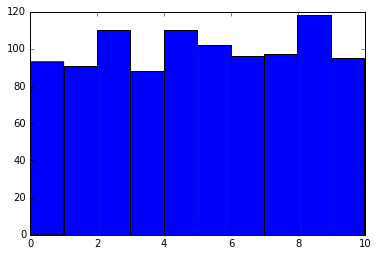

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt

x = numpy.random.uniform(0, 10, 1000)
r = plt.hist(x)

Distribución normal con [normal](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html#numpy.random.normal).

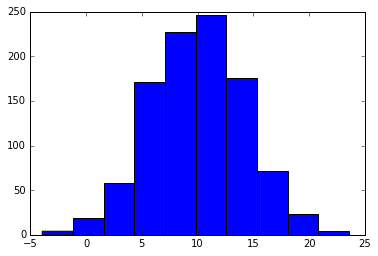

In [32]:
x = numpy.random.normal(10, 4, 1000)
r = plt.hist(x)

## Indexado

El indexado de los arrays de una dimensión es muy similar a de cualquier otra secuencia de Python

In [33]:
vector = numpy.array([0, 1, 2, 3, 4])

In [34]:
vector[2]

2

In [35]:
vector[2:]

array([2, 3, 4])

Si los arrays tienen varias dimensiones podemos utilizar tantos índices como dimensiones tengan.

In [37]:
mat = numpy.array([[1, 2, 3, 4], [5, 6, 7, 8]])
mat[1, 1]

6

In [38]:
mat[:, 1]

array([2, 6])

In [39]:
mat[1, :]

array([5, 6, 7, 8])

### Indexado con secuencias

Además del indexado básico, los arrays de Numpy pueden ser indexados utilizando secuencias.
Por ejemplo, podemos pedir una lista de elementos.

In [41]:
vector[[0, 2, 3]]

array([0, 2, 3])

También podemos utilizar máscaras booleanas.

In [48]:
mascara = numpy.array([False, False,  True,  True,  True], dtype=bool)
vector[mascara]

array([2, 3, 4])

Este indexado con máscaras es especialmente útil cuando lo combinamos con los operadores de comparación

In [50]:
mascara = vector >= 2
print(mascara)
vector[mascara]

[False False  True  True  True]


array([2, 3, 4])

Podemos realizar la misma operación en un solo paso.

In [51]:
vector[vector >=3]

array([3, 4])

Podemos combinar esta funcionalidad de las máscaras con la asignación.

In [53]:
vector[vector >= 3] = 0
print(vector)

[0 1 2 0 0]


Por último, podemos obtener la posión de los elementos verdaderos de la máscara usando [where](https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html).

In [54]:
mascara = vector == 0
numpy.where(mascara)

(array([0, 3, 4]),)

O en un solo paso.

In [56]:
numpy.where(vector == 0)

(array([0, 3, 4]),)

## Estadísticas descriptivas básicas

In [58]:
x = numpy.random.normal(10, 4, 1000)

In [60]:
numpy.mean(x)

9.9349635541443053

In [62]:
numpy.std(x)

3.8858259720034334

In [63]:
numpy.min(x)

-3.5425367788407573

In [64]:
numpy.max(x)

22.350208493704791

In [65]:
numpy.percentile(x, 90)

15.03050988774438

In [66]:
numpy.sum(x)

9934.9635541443058

Todas estas operaciones pueden realizarse en arrays bidimensionales, o de cualquier otra dimensión, a lo largo de un eje.

In [74]:
mat = numpy.array([[0, 1, 2, 3, 4], [5, 6, 7, 8, 9]])

In [73]:
numpy.mean(mat, axis=0)

array([ 2.5,  3.5,  4.5,  5.5,  6.5])

In [75]:
numpy.mean(mat, axis=1)

array([ 2.,  7.])

In [76]:
numpy.sum(mat, axis=0)

array([ 5,  7,  9, 11, 13])

In [77]:
numpy.sum(mat, axis=1)

array([10, 35])

## Álgebra lineal

Podemos multiplicar, sumar, restar y dividir con esaclares.

In [78]:
a = numpy.array([0, 1, 2, 3])

In [80]:
a + 10

array([10, 11, 12, 13])

In [81]:
a - 2

array([-2, -1,  0,  1])

In [82]:
a * 4

array([ 0,  4,  8, 12])

In [83]:
a / 3

array([ 0.        ,  0.33333333,  0.66666667,  1.        ])

Si multiplicamos, sumamos, restamos o dividimos arrays el comportamiento por defecto es hacerlo elemento por elemento.

In [84]:
b = numpy.array([4, 5, 6, 7])

In [85]:
a + b

array([ 4,  6,  8, 10])

In [86]:
a - b

array([-4, -4, -4, -4])

In [87]:
a * b

array([ 0,  5, 12, 21])

In [88]:
a / b

array([ 0.        ,  0.2       ,  0.33333333,  0.42857143])

Si queremos hacer una multiplicación matricial tenemos que usar la función [dot](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html).

In [89]:
numpy.dot(a, b)

38